In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# Data cleaning and Data preprocessing :

In [40]:
df=pd.read_csv(r'Diwali Sales Data.csv',encoding='unicode_escape')

In [41]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [43]:
df.shape

(11251, 15)

In [44]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [46]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [49]:
df['Amount']=df['Amount'].astype('int')

In [50]:
def change_num(num):
  if num==1:return "Married"
  else:return "Unmarried"


df['Marital_Status']=df['Marital_Status'].apply(change_num)

In [51]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,Married,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,Married,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,Unmarried,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,Married,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,Unmarried,Delhi,Central,Banking,Auto,1,23770


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [53]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


# Corelation and it's heatmap :

In [54]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Age,Orders,Amount
User_ID,1.000000,0.022338,-0.016022,-0.011997
Age,0.022338,1.000000,0.008090,0.030941
Orders,-0.016022,0.008090,1.000000,-0.013184
Amount,-0.011997,0.030941,-0.013184,1.000000


<ipython-input-55-99214bf9646f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=sns.heatmap(df.corr(),annot=True)


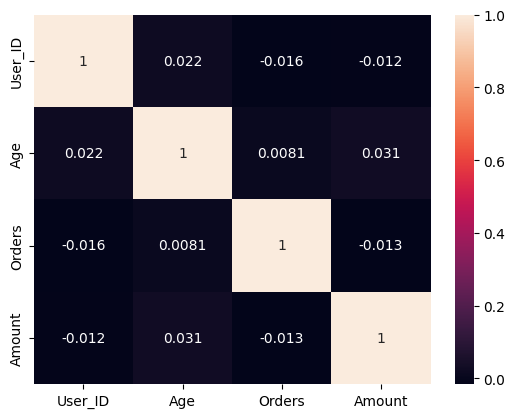

In [55]:
a=sns.heatmap(df.corr(),annot=True)
plt.show(a)

# THE MALE FEMALE COMPARISON GRAPH :

<Axes: ylabel='User_ID'>

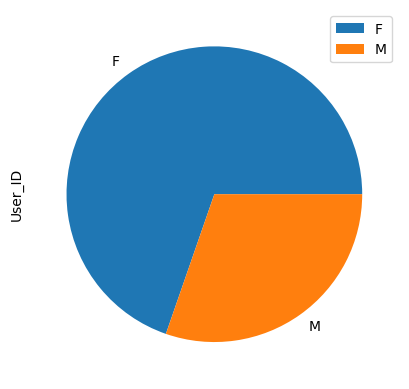

In [56]:
df.groupby(['Gender']).sum(numeric_only=False).plot(kind='pie',y='User_ID')

# Average spending amount according to age groups :

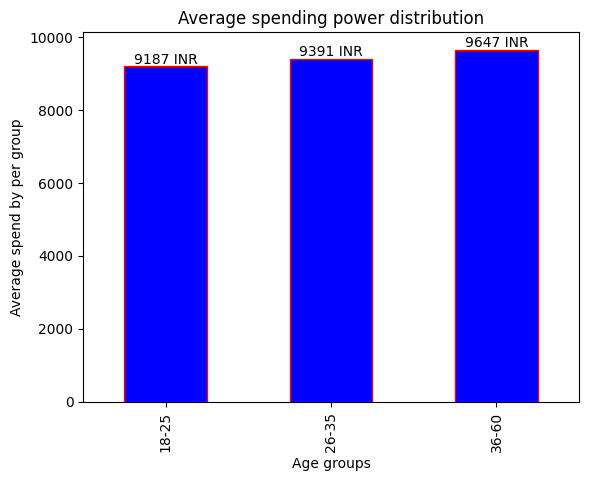

In [57]:
df['age_grp']=pd.cut(df['Age'],bins=[18,25,35,60],labels=['18-25','26-35','36-60'])
ageGrp=df.groupby(['age_grp'])['Amount'].mean()
exact=ageGrp.plot(kind='bar',color="blue",edgecolor="red")


plt.title("Average spending power distribution")
plt.xlabel("Age groups")
plt.ylabel("Average spend by per group")


for index,value in enumerate(ageGrp):
  exact.text(index,value,f"{int(value)} INR",ha="center",va="bottom",fontsize=10)
plt.show()

In [58]:
df.drop('age_grp',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


# Male female number comparison and more about analysis of gender based data :

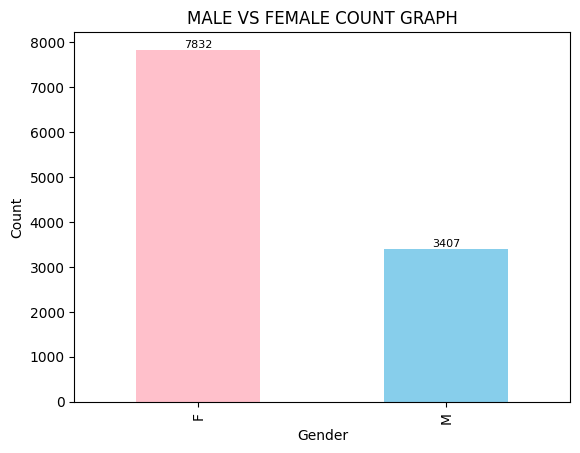

In [65]:
gender=df['Gender'].value_counts()
male=gender.get("M",0)
female=gender.get("F",0)
colors = ['pink','skyblue']
graph=gender.plot(kind="bar",color=colors)

for index,value in enumerate(gender):
  graph.text(index,value,f'{value}',ha="center",va="bottom",fontsize=8)


plt.title("MALE VS FEMALE COUNT GRAPH")
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()




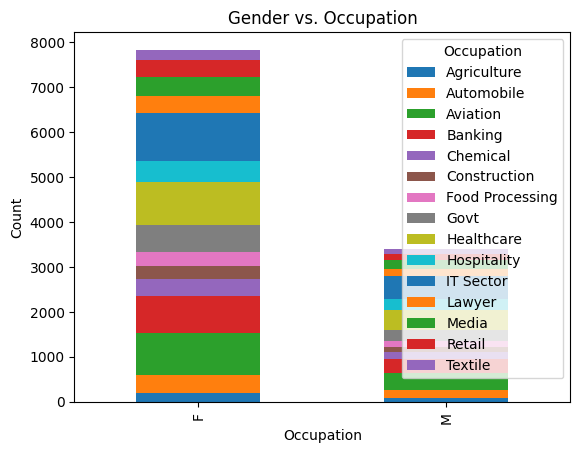

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


data = df.groupby(['Gender', 'Occupation']).size()
table = data.unstack()
table.plot(kind='bar', stacked=True)

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Gender vs. Occupation')

plt.show()


In [85]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

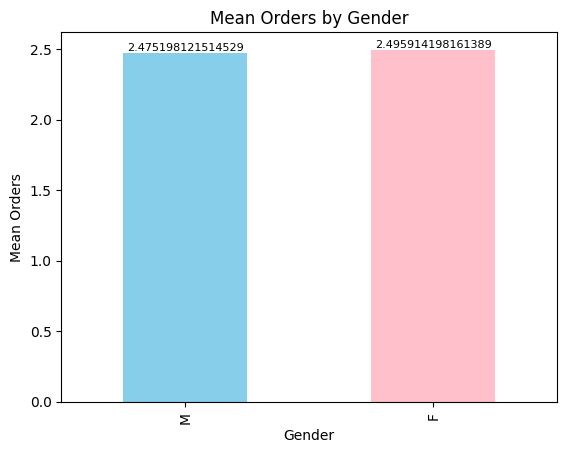

In [98]:
order=df.groupby('Gender')['Orders'].mean().sort_values()
colors = ['skyblue','pink']
graph=order.plot(kind="bar",color=colors)
plt.xlabel('Gender')
plt.ylabel('Mean Orders')
plt.title('Mean Orders by Gender')
for index,value in enumerate(order):
  graph.text(index,value,f'{value}',ha="center",va="bottom",fontsize=8)
plt.show()

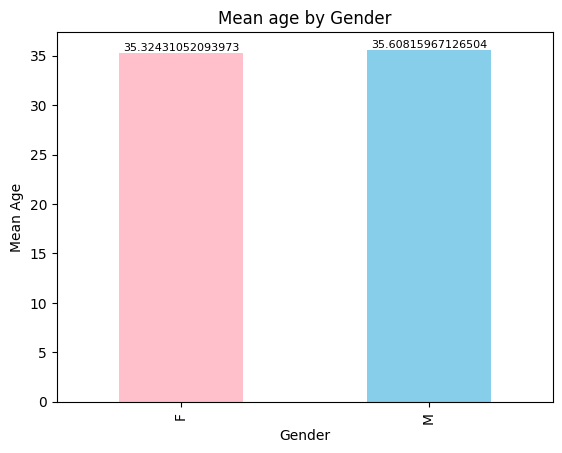

In [99]:
age=df.groupby('Gender')['Age'].mean().sort_values()
colors = ['pink','skyblue']

graph=age.plot(kind="bar",color=colors)
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.title('Mean age by Gender')
for index,value in enumerate(age):
  graph.text(index,value,f'{value}',ha="center",va="bottom",fontsize=8)
plt.show()

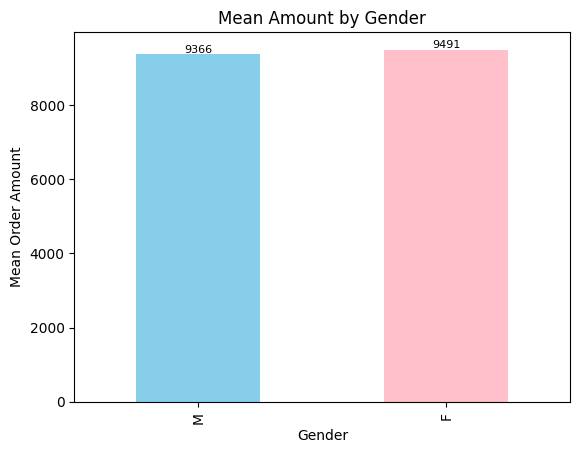

In [100]:
amount=df.groupby('Gender')['Amount'].mean().sort_values()
colors = ['skyblue','pink']
graph=amount.plot(kind="bar",color=colors)
plt.xlabel('Gender')
plt.ylabel('Mean Order Amount')
plt.title('Mean Amount by Gender')
for index,value in enumerate(amount):
  graph.text(index,value,f'{int(value)}',ha="center",va="bottom",fontsize=8)
plt.show()

<Axes: >

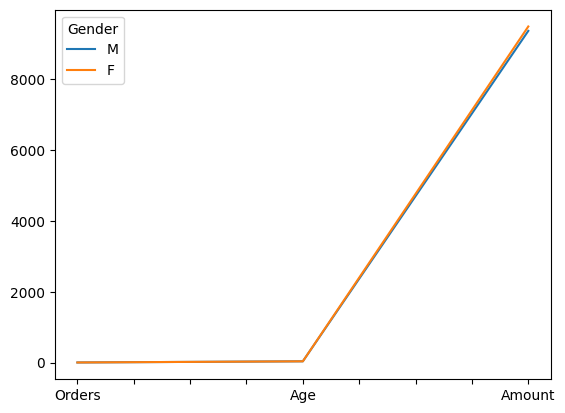

In [102]:
df2 = df.groupby('Gender')[['Orders',
       'Age',
       'Amount']].mean().sort_values(by="Age",ascending=False)
df3 = df2.transpose()
df3.plot()

# Purchasing power based on occupation and amount :

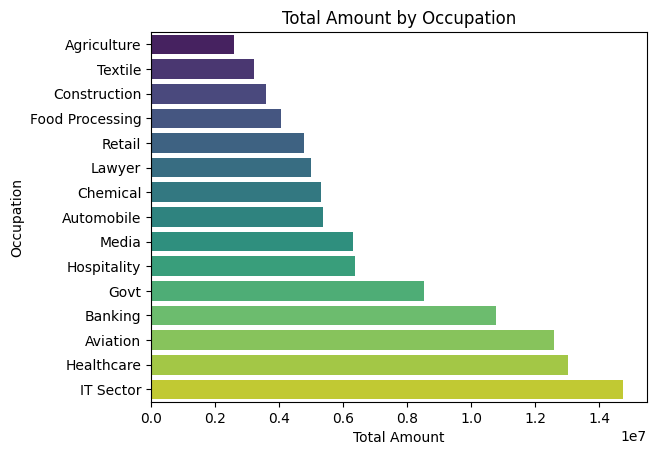

In [105]:
power_sorted=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount")


sns.barplot(x='Amount', y='Occupation', data=power_sorted, palette='viridis')

plt.xlabel('Total Amount')
plt.ylabel('Occupation')
plt.title('Total Amount by Occupation')

plt.show()


# Catergories of Products ordered and their distribution:

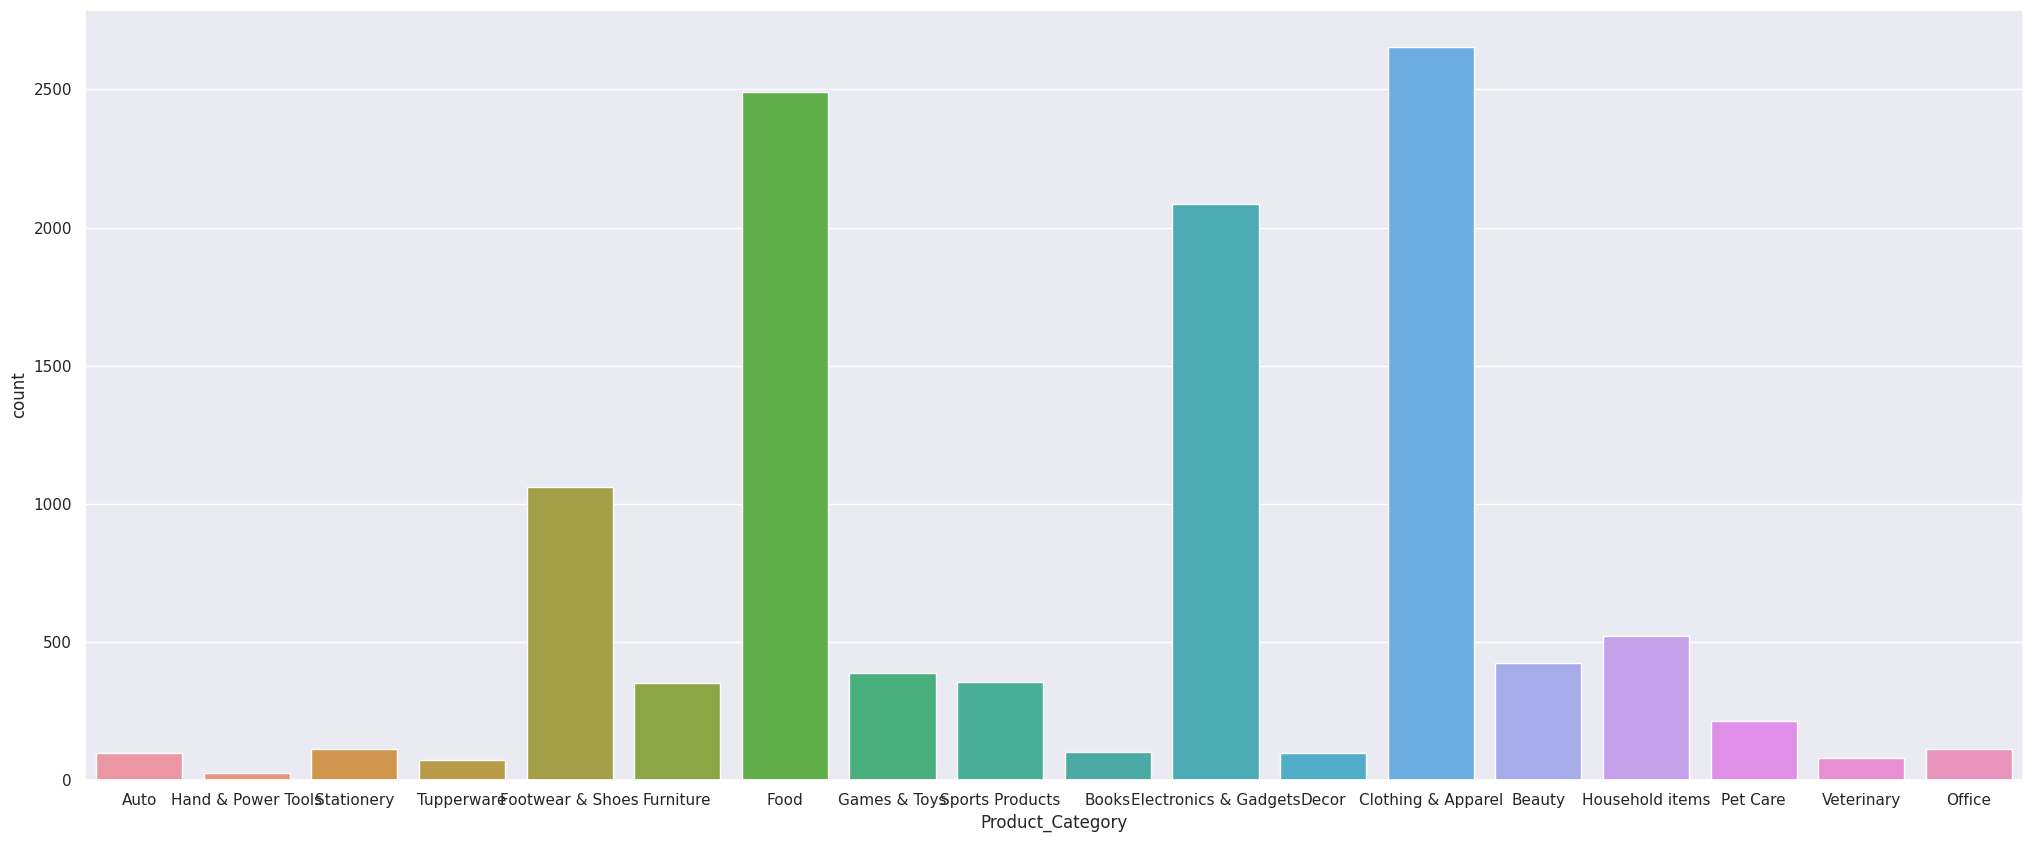

In [111]:
sns.set(rc={'figure.figsize':(25,10)})
graph=sns.countplot(data=df,x='Product_Category')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  object
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


# Married and Unmarried comparisons :

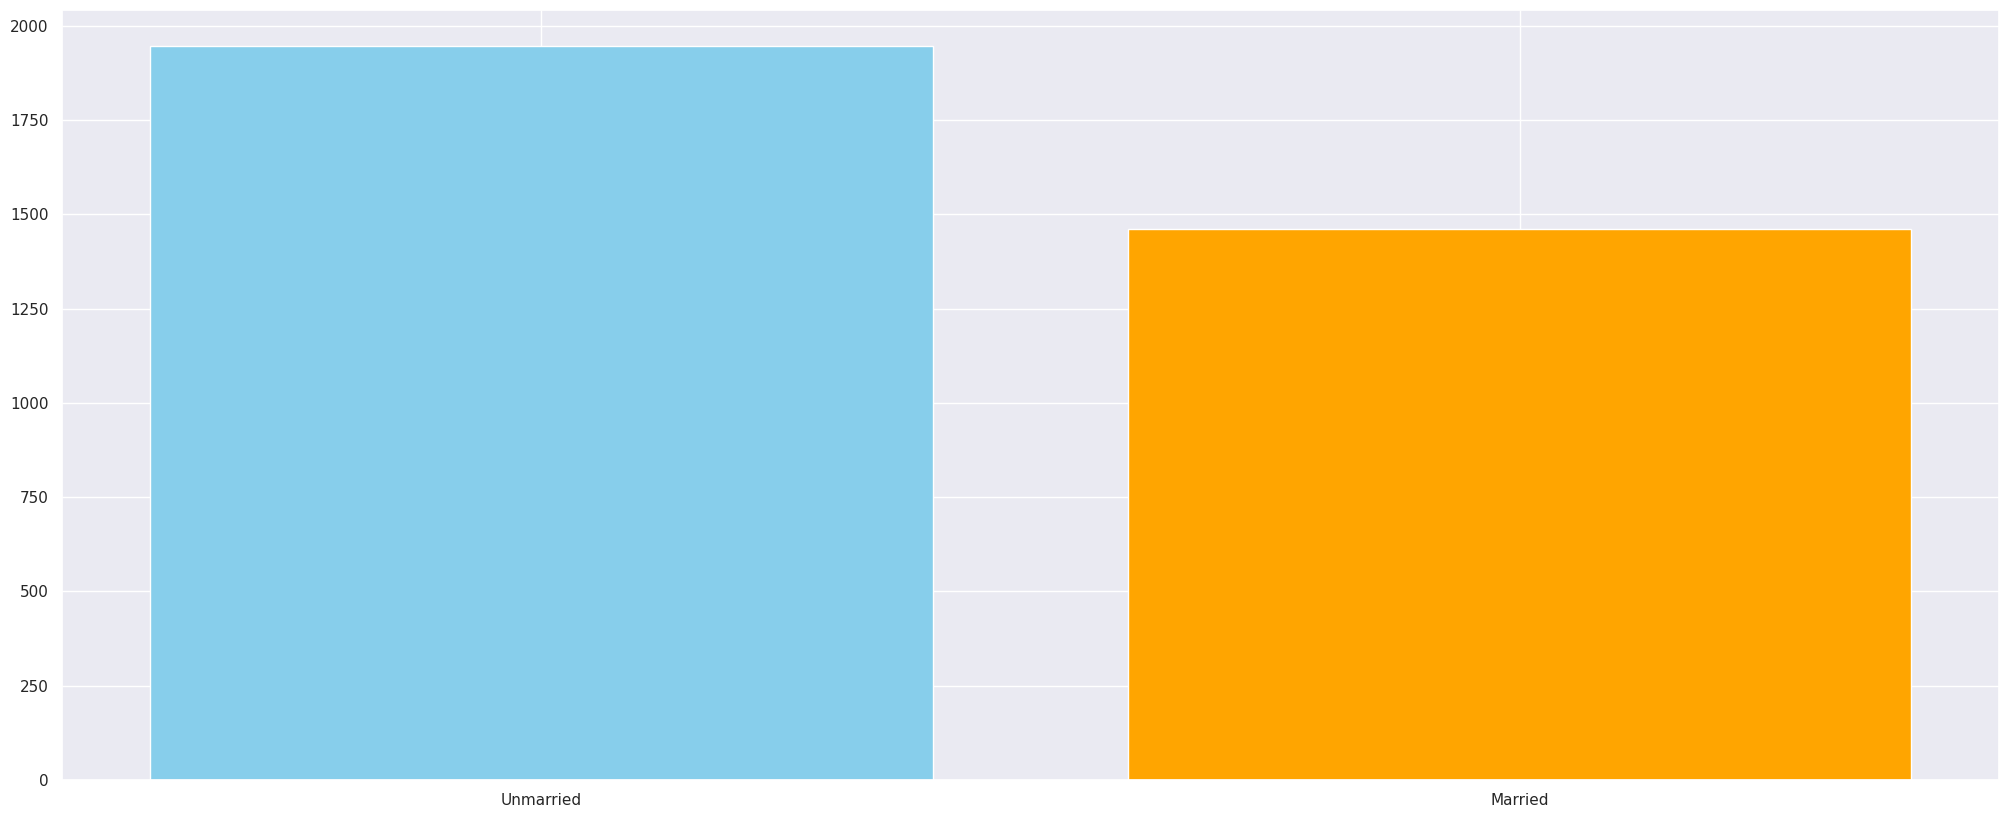

In [115]:
male=df[df['Gender']=='M']
cnt=male.groupby('Marital_Status').size()
unmarried_male_count = cnt.get('Unmarried', 0)
married_male_count = cnt.get('Married', 0)
plt.bar(['Unmarried', 'Married'], [unmarried_male_count, married_male_count], color=['skyblue', 'orange'])

plt.show()

# Analysis of order data based on their state

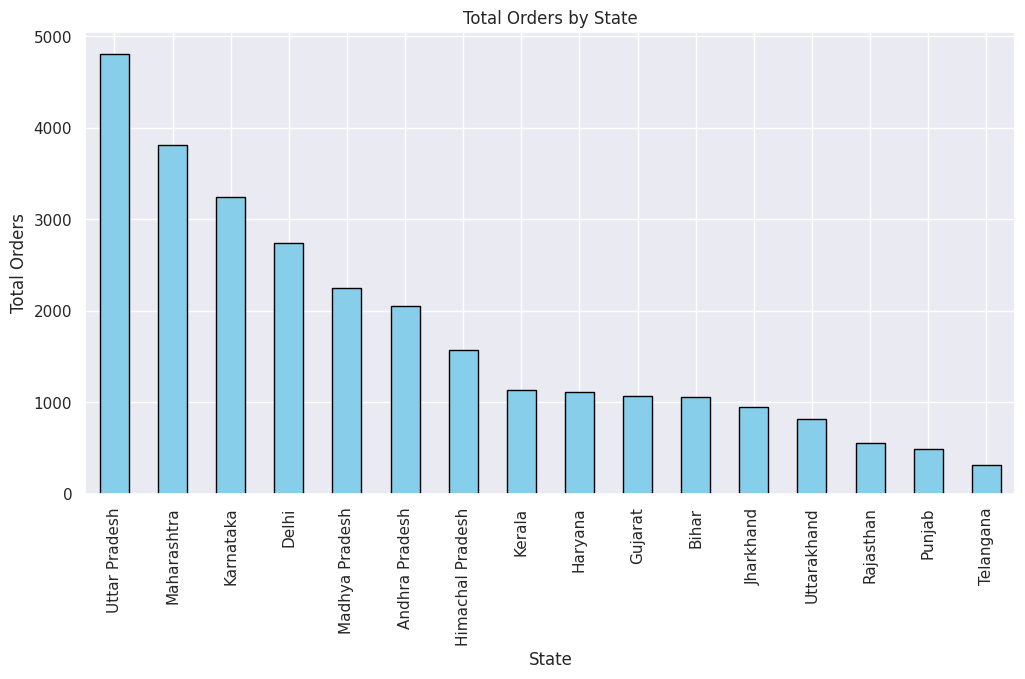

In [116]:
state_order_sum = df.groupby('State')['Orders'].sum()
state_order_sum_sorted = state_order_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_order_sum_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Total Orders by State')

plt.show()
